# Image Filtering

This notebook looks into demonstrating image filtering in the frequency domain by implementing Fast Fourier Transform (FFT) algorithm and Butterworth Notch Filter. The images used in this experimentation is taken taken from Pinterest and Google which are now saved to my personal GitHub repository.

Before anything, we should first setup our environment.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from google.colab.patches import cv2_imshow as cv_imshow

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Low-pass filter

For the first experimentation, we want to implement image low-pass filtering with Fast Fourier Transform (FFT).

In [3]:
raw_image = io.imread("https://github.com/dzniel/binus-computer-vision-course/blob/main/image/fintry-falls.png?raw=true")
raw_image.shape

(700, 465)

The shape of the image indicates that it is grayscaled.

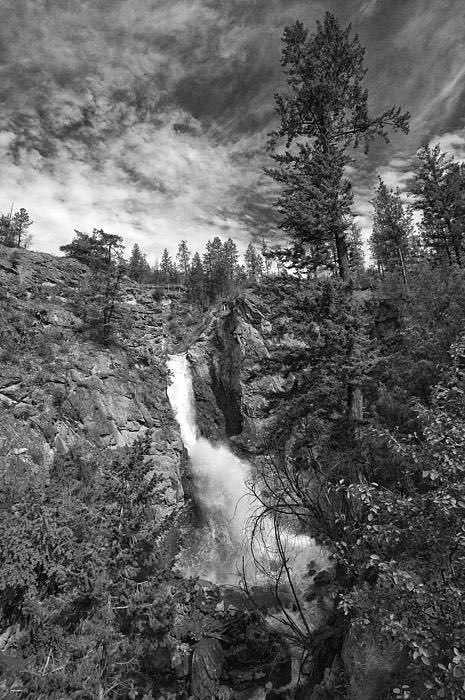

In [4]:
cv_imshow(raw_image)

We can continue to transform and inspect the fourier spectrum of the image.

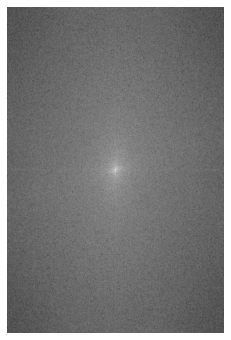

In [5]:
raw_image_fft = np.fft.fftshift(np.fft.fft2(raw_image))
plt.figure(figsize=(8, 6))
plt.imshow(np.log1p(np.abs(raw_image_fft)), cmap="gray")
plt.axis("off")
plt.show()

Now we will implement the low-pass filter for the image fourier spectrum.

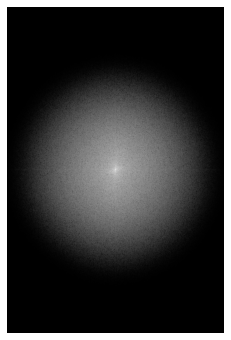

In [6]:
height, width = raw_image_fft.shape
low_pass_filter = np.zeros((height, width), dtype=np.float32)
D0 = 50
for u in range(height):
  for v in range(width):
    D = np.sqrt((u - height / 2) **2 + (v - width / 2) ** 2)
    low_pass_filter[u, v] = np.exp(-D ** 2 / (2 * D0 * D0))

low_pass_spectrum = raw_image_fft * low_pass_filter
plt.figure(figsize=(8, 6))
plt.imshow(np.log1p(np.abs(low_pass_spectrum)), cmap="gray")
plt.axis("off")
plt.show()

Then we can restore the transformed image by utilizing inverse Fast Fourier Transform method.

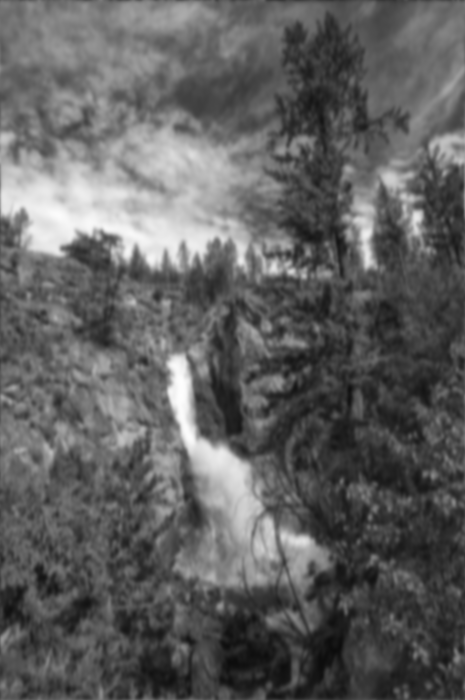

In [7]:
inversed_low_pass_spectrum = np.fft.ifftshift(low_pass_spectrum)
low_pass_image = np.abs(np.fft.ifft2(np.fft.ifftshift(inversed_low_pass_spectrum)))
cv_imshow(low_pass_image)

To wrap up the first experimentation, we visualize the entirety of the low-pass filter processes.

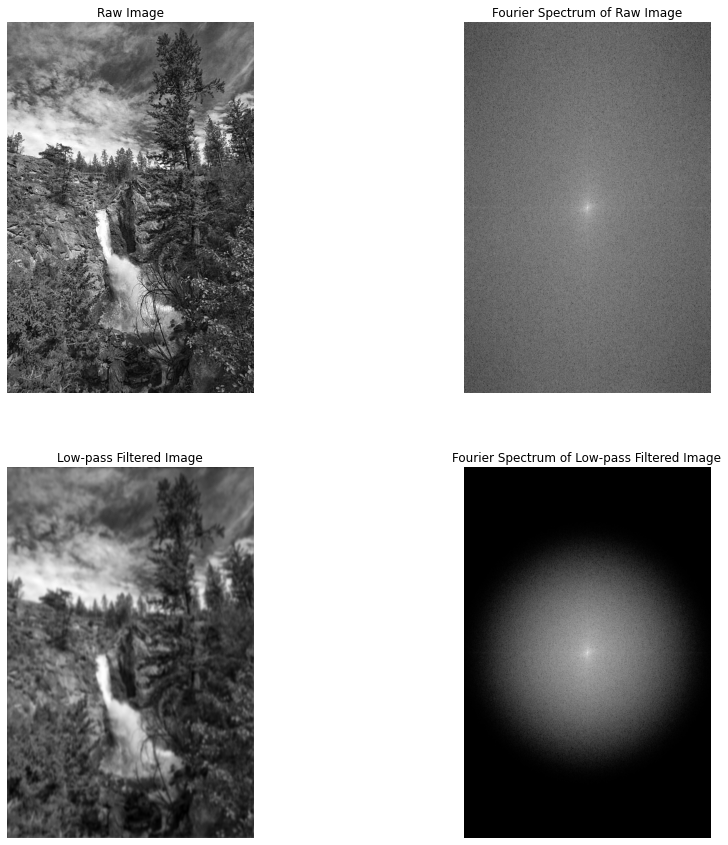

In [8]:
fig, axes = plt.subplots(nrows=2, 
                         ncols=2,
                         figsize=(15, 15))

axes = axes.flatten()
axes[0].imshow(raw_image, cmap="gray")
axes[0].axis("off")
axes[0].set_title("Raw Image")
axes[1].imshow(np.log1p(np.abs(raw_image_fft)), cmap="gray")
axes[1].axis("off")
axes[1].set_title("Fourier Spectrum of Raw Image")
axes[2].imshow(low_pass_image, cmap="gray")
axes[2].axis("off")
axes[2].set_title("Low-pass Filtered Image")
axes[3].imshow(np.log1p(np.abs(low_pass_spectrum)), cmap="gray")
axes[3].axis("off")
axes[3].set_title("Fourier Spectrum of Low-pass Filtered Image")
plt.show()

## High-pass Filter

For the second experimentation, we want to implement image high-pass filtering with Fast Fourier Transform (FFT) on the same image as before.

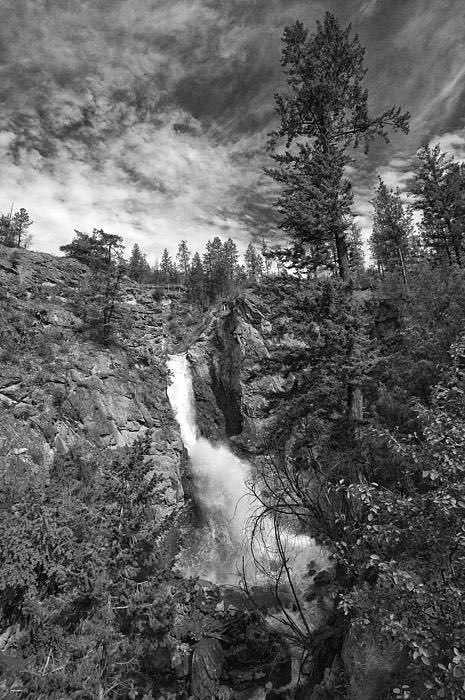

In [9]:
cv_imshow(raw_image)

It should have the same fourier spectrum as before. Let's quickly check and move on.

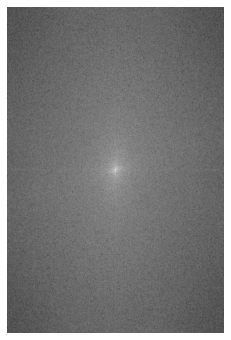

In [10]:
plt.figure(figsize=(8, 6))
plt.imshow(np.log1p(np.abs(raw_image_fft)), cmap="gray")
plt.axis("off")
plt.show()

Next, we implement high-pass filter for the image fourier spectrum.

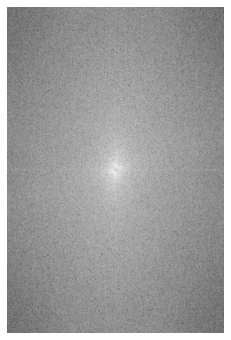

In [11]:
height, width = raw_image_fft.shape
high_pass_filter = np.zeros((height, width), dtype=np.float32)
D0 = 5
for u in range(height):
  for v in range(width):
    D = np.sqrt((u - height / 2) ** 2 + (v - width / 2) ** 2)
    high_pass_filter[u, v] = 1 - np.exp(-D ** 2 / (2 * D0 * D0))

high_pass_spectrum = raw_image_fft * high_pass_filter
plt.figure(figsize=(8, 6))
plt.imshow(np.log1p(np.abs(high_pass_spectrum)), cmap="gray")
plt.axis("off")
plt.show()

To restore the transformed image, we use the Inverse Fast Fourier Transform method.

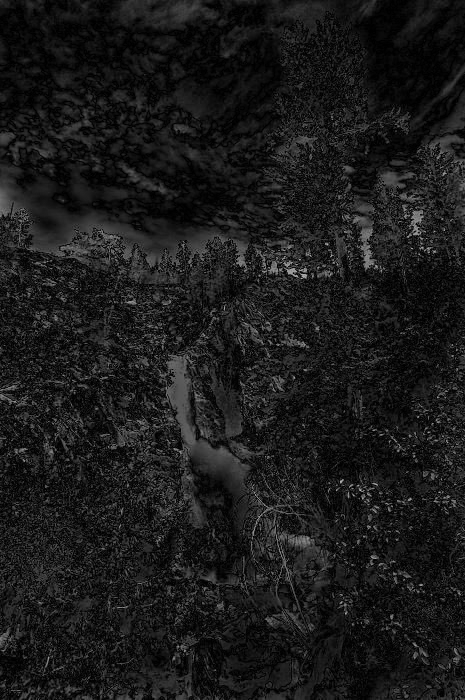

In [12]:
inversed_high_pass_spectrum = np.fft.ifftshift(high_pass_spectrum)
high_pass_image = np.abs(np.fft.ifft2(np.fft.ifftshift(inversed_high_pass_spectrum)))
cv_imshow(high_pass_image)

To wrap up the second experimentation, once again we visualize the entirety of the high-pass filter processes.

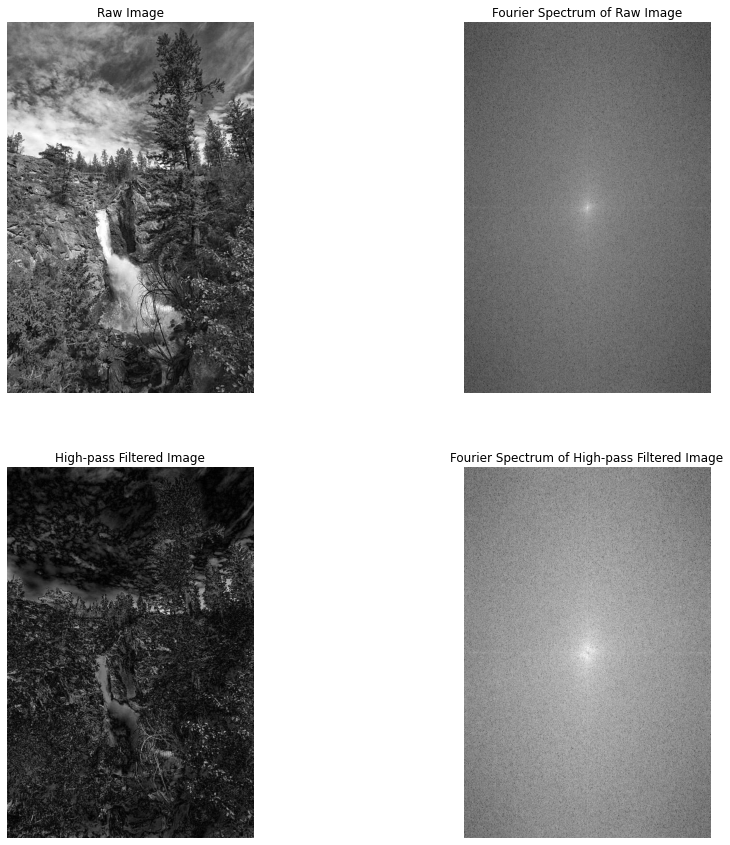

In [13]:
fig, axes = plt.subplots(nrows=2, 
                         ncols=2,
                         figsize=(15, 15))

axes = axes.flatten()
axes[0].imshow(raw_image, cmap="gray")
axes[0].axis("off")
axes[0].set_title("Raw Image")
axes[1].imshow(np.log1p(np.abs(raw_image_fft)), cmap="gray")
axes[1].axis("off")
axes[1].set_title("Fourier Spectrum of Raw Image")
axes[2].imshow(high_pass_image, cmap="gray")
axes[2].axis("off")
axes[2].set_title("High-pass Filtered Image")
axes[3].imshow(np.log1p(np.abs(high_pass_spectrum)), cmap="gray")
axes[3].axis("off")
axes[3].set_title("Fourier Spectrum of High-pass Filtered Image")
plt.show()

## Butterworth Notch Filter

For the third experimentation, we want to design a Butterworth Notch Filter to help remove repetitive noises in the image.

In [14]:
noisy_image = io.imread("https://github.com/dzniel/binus-computer-vision-course/blob/main/image/car-with-noise.png?raw=true")
noisy_image.shape

(268, 184, 4)

For this image, the shape indicates that it is not grayscaled since there are 4 color channels.

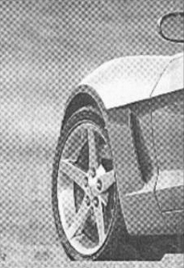

In [15]:
cv_imshow(noisy_image)

Though it is not that obvious, we should still convert it to a grayscaled image for our experimentation.

In [16]:
noisy_image = cv.cvtColor(noisy_image, cv.COLOR_BGR2GRAY)
noisy_image.shape

(268, 184)

Okay, that's what we want.

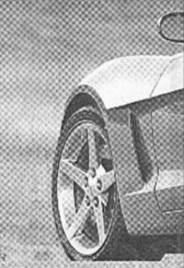

In [17]:
cv_imshow(noisy_image)

Let's check out the fourier spectrum of the image.

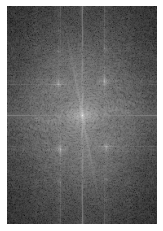

In [18]:
noisy_image_fft = np.fft.fftshift(np.fft.fft2(noisy_image))
plt.imshow(np.log1p(np.abs(noisy_image_fft)), cmap="gray")
plt.axis("off")
plt.show()

As it shows in the frequency domain, there are four noticeable noises.

In [19]:
def notch_reject_filter(shape, d0=9, u_k=0, v_k=0):
  height, width = shape
  filter = np.zeros((height, width))
  for u in range(height):
    for v in range(width):
      distance = np.sqrt((u - height / 2 + u_k) ** 2 + (v - width / 2 + v_k) ** 2)
      inversed_distance = np.sqrt((u - height / 2 - u_k) ** 2 + (v - width / 2 - v_k) ** 2)
      filter[u, v] = 0 if distance <= d0 or inversed_distance <= d0 else 1
  
  return filter

To reduce those noises, we can suppress those white spots by filtering each noticeable white spots.

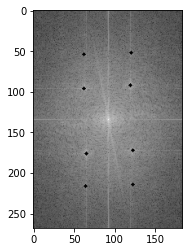

In [20]:
filter_1 = notch_reject_filter(noisy_image.shape, 2, 38, 30)
filter_2 = notch_reject_filter(noisy_image.shape, 2, -42, 27)
filter_3 = notch_reject_filter(noisy_image.shape, 2, 80, 30)
filter_4 = notch_reject_filter(noisy_image.shape, 2, -82, 28)
notch_filter = filter_1 * filter_2 * filter_3 * filter_4
notch_reject_spectrum = noisy_image_fft * notch_filter
plt.imshow(np.log1p(np.abs(notch_reject_spectrum)), cmap="gray")
plt.show()

Once again we can restore the image with Inverse Fast Fourier Transform method.

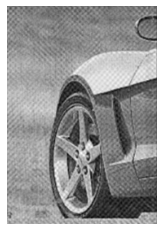

In [21]:
notch_filtered_image = np.abs(np.fft.ifft2(notch_reject_spectrum))
plt.imshow(notch_filtered_image, cmap="gray")
plt.axis("off")
plt.show()

To wrap up the third experimentation, once again we visualize the entirety of the repetitive noise removal processes.

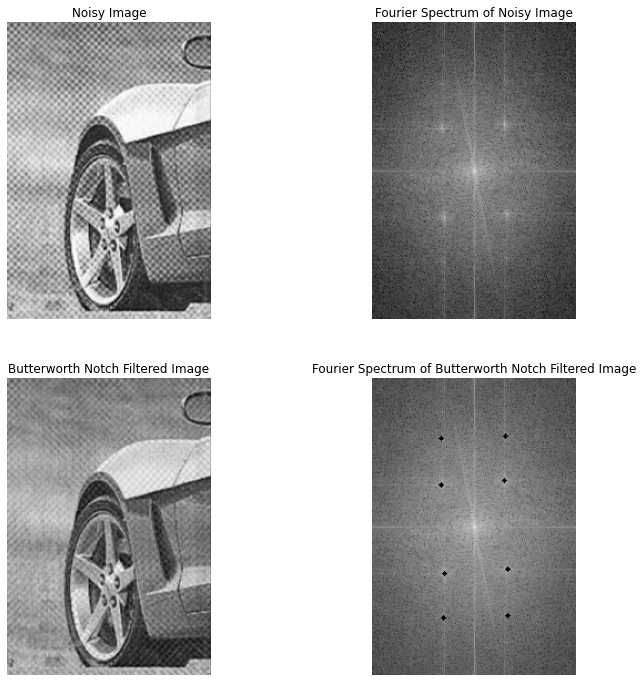

In [22]:
fig, axes = plt.subplots(nrows=2, 
                         ncols=2,
                         figsize=(12, 12))

axes = axes.flatten()
axes[0].imshow(noisy_image, cmap="gray")
axes[0].axis("off")
axes[0].set_title("Noisy Image")
axes[1].imshow(np.log1p(np.abs(noisy_image_fft)), cmap="gray")
axes[1].axis("off")
axes[1].set_title("Fourier Spectrum of Noisy Image")
axes[2].imshow(notch_filtered_image, cmap="gray")
axes[2].axis("off")
axes[2].set_title("Butterworth Notch Filtered Image")
axes[3].imshow(np.log1p(np.abs(notch_reject_spectrum)), cmap="gray")
axes[3].axis("off")
axes[3].set_title("Fourier Spectrum of Butterworth Notch Filtered Image")
plt.show()